### 1.Завантажити дані, вивести назви колонок і розмір датасета

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

df_heart = pd.read_csv('heart.csv')

print("Назви колонок:")
for i in df_heart.columns:
    print(i)
print("Розмір датасету:",df_heart.shape[0])


Назви колонок:
HeartDisease
BMI
Smoking
AlcoholDrinking
Stroke
PhysicalHealth
MentalHealth
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
SleepTime
Asthma
KidneyDisease
SkinCancer
Розмір датасету: 319795


In [52]:
print("Пропуски у даних:\n", df_heart.isnull().sum())

Пропуски у даних:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [53]:
binary_columns = ""



genHealth = [ 'Poor',  'Fair', 'Good', 'Very good', 'Excellent']
sex = ['Male','Female']
ageCategory =  {'18-24',  '25-29','30-34', '35-39', '40-44', '45-49', '50-54','55-59', '60-64','65-69', '70-74', '75-79',  '80 or older'}
race =  ['White', 'Hispanic', 'Other', 'American Indian/Alaskan Native', 'Black', 'Asian']
diabetic =  ['No', 'No, borderline diabetes',  'Yes',  'Yes (during pregnancy)']
bolean = ['No','Yes']

binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 
                  'DiffWalking', 'PhysicalActivity', 'Asthma', 
                  'KidneyDisease', 'SkinCancer']

df_heart[binary_columns] = df_heart[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


df_heart['GenHealth'] = pd.Categorical(df_heart['GenHealth'], categories=genHealth, ordered=True)
df_heart['GenHealth'] = df_heart['GenHealth'].cat.codes

df_heart['Sex'] = pd.Categorical(df_heart['Sex'], categories=sex, ordered=True)
df_heart['Sex'] = df_heart['Sex'].cat.codes

df_heart['AgeCategory'] = pd.Categorical(df_heart['AgeCategory'], categories=ageCategory, ordered=True)
df_heart['AgeCategory'] = df_heart['AgeCategory'].cat.codes

df_heart['Race'] = pd.Categorical(df_heart['Race'], categories=race, ordered=True)
df_heart['Race'] = df_heart['Race'].cat.codes

df_heart['Diabetic'] = pd.Categorical(df_heart['Diabetic'], categories=diabetic, ordered=True)
df_heart['Diabetic'] = df_heart['Diabetic'].cat.codes


print(df_heart)


        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffW

<p align="center"> <font size="5">Візуалізація даних</font></p>

<p align="center"> <font size="4">Heatmap</font></p>

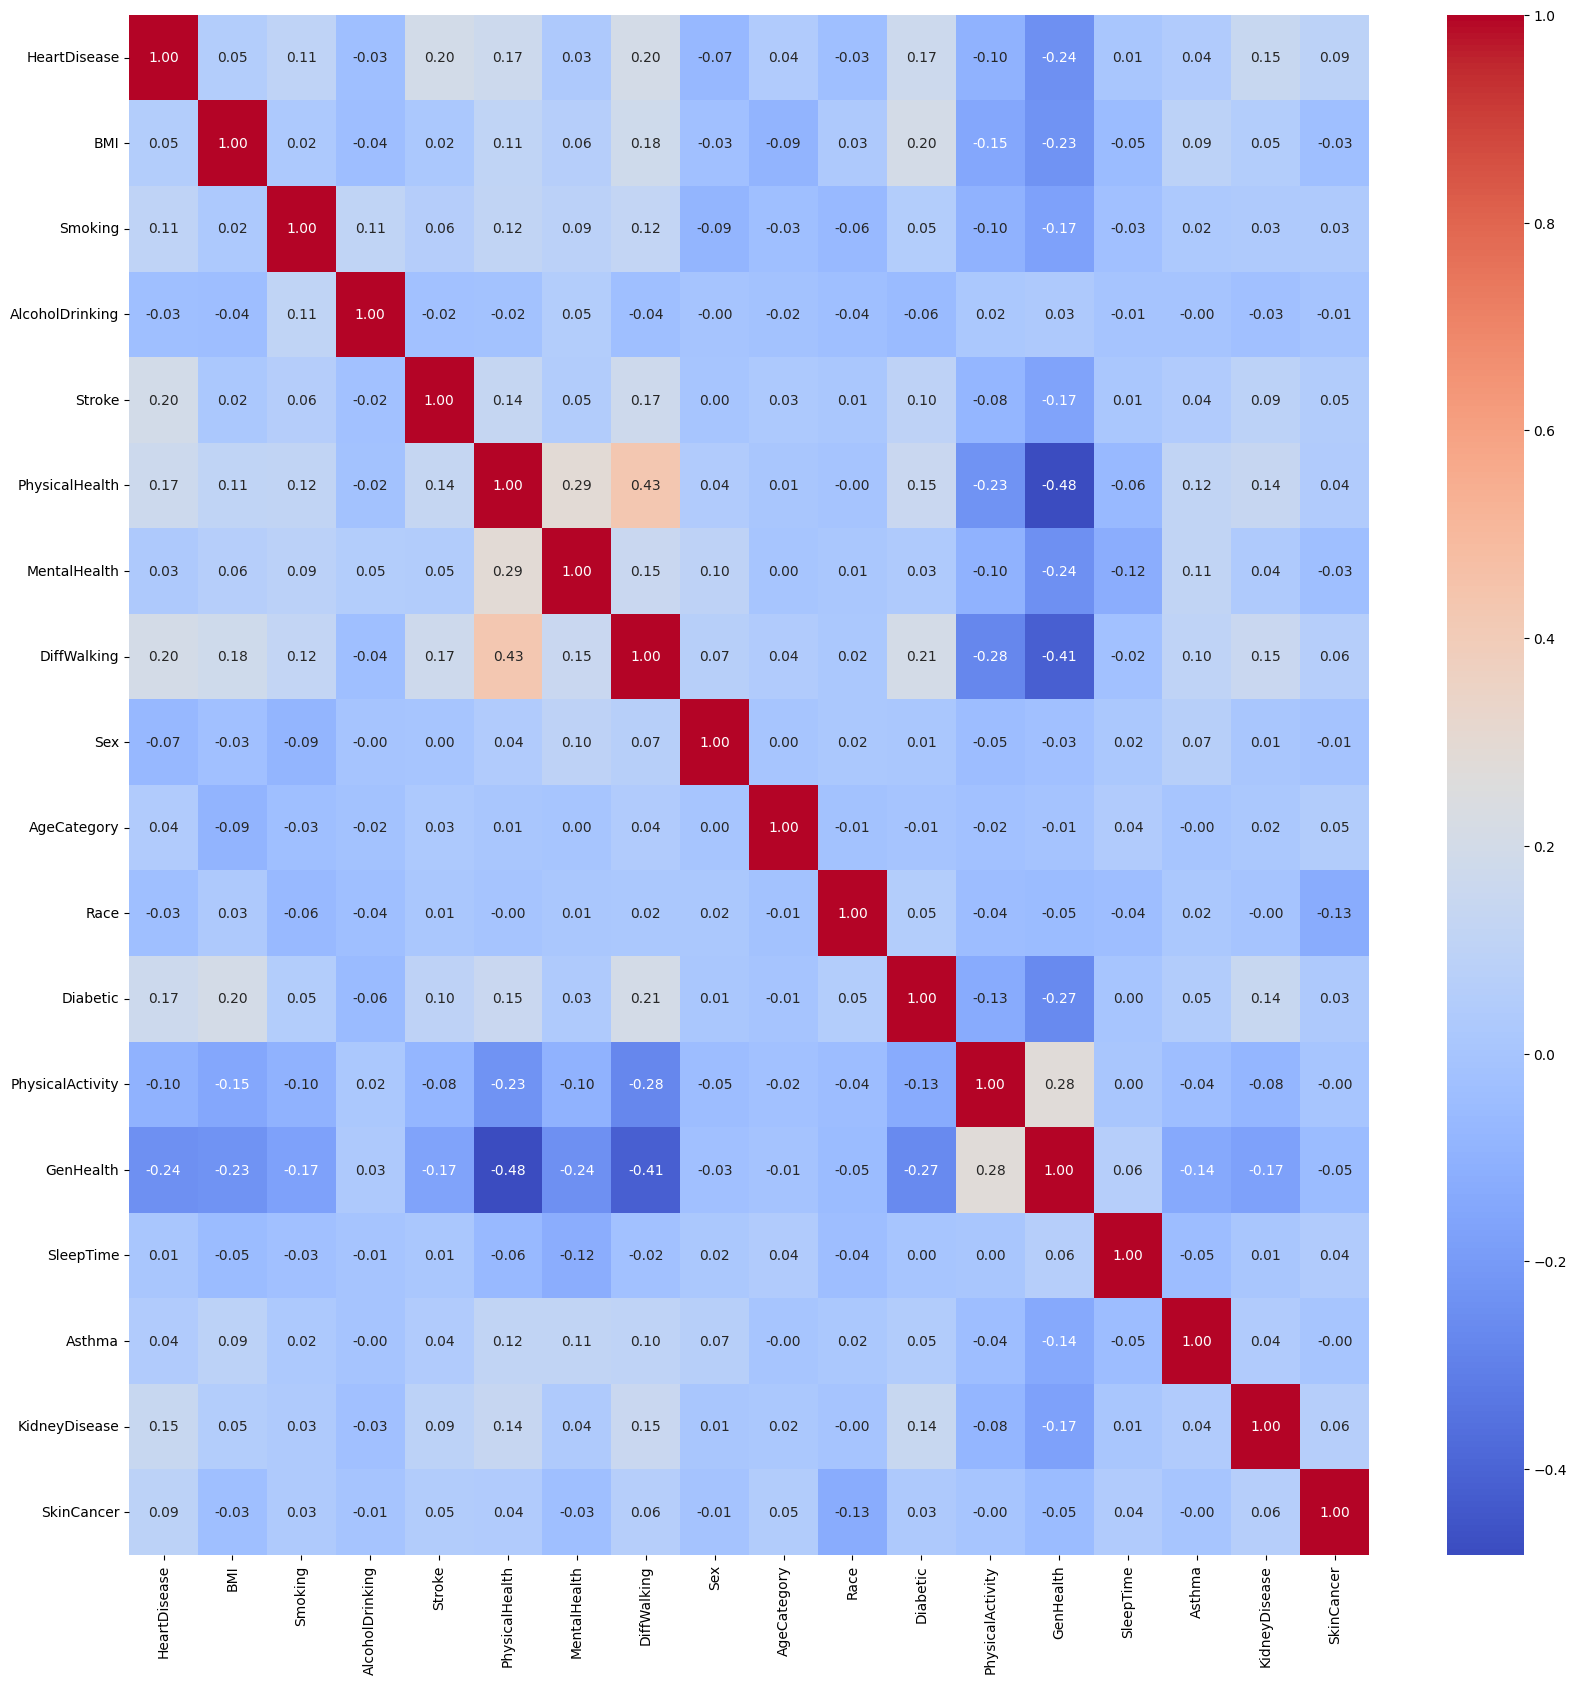

In [54]:
corr = df_heart.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

<p align="center"> <font size="4">Histogram</font></p>

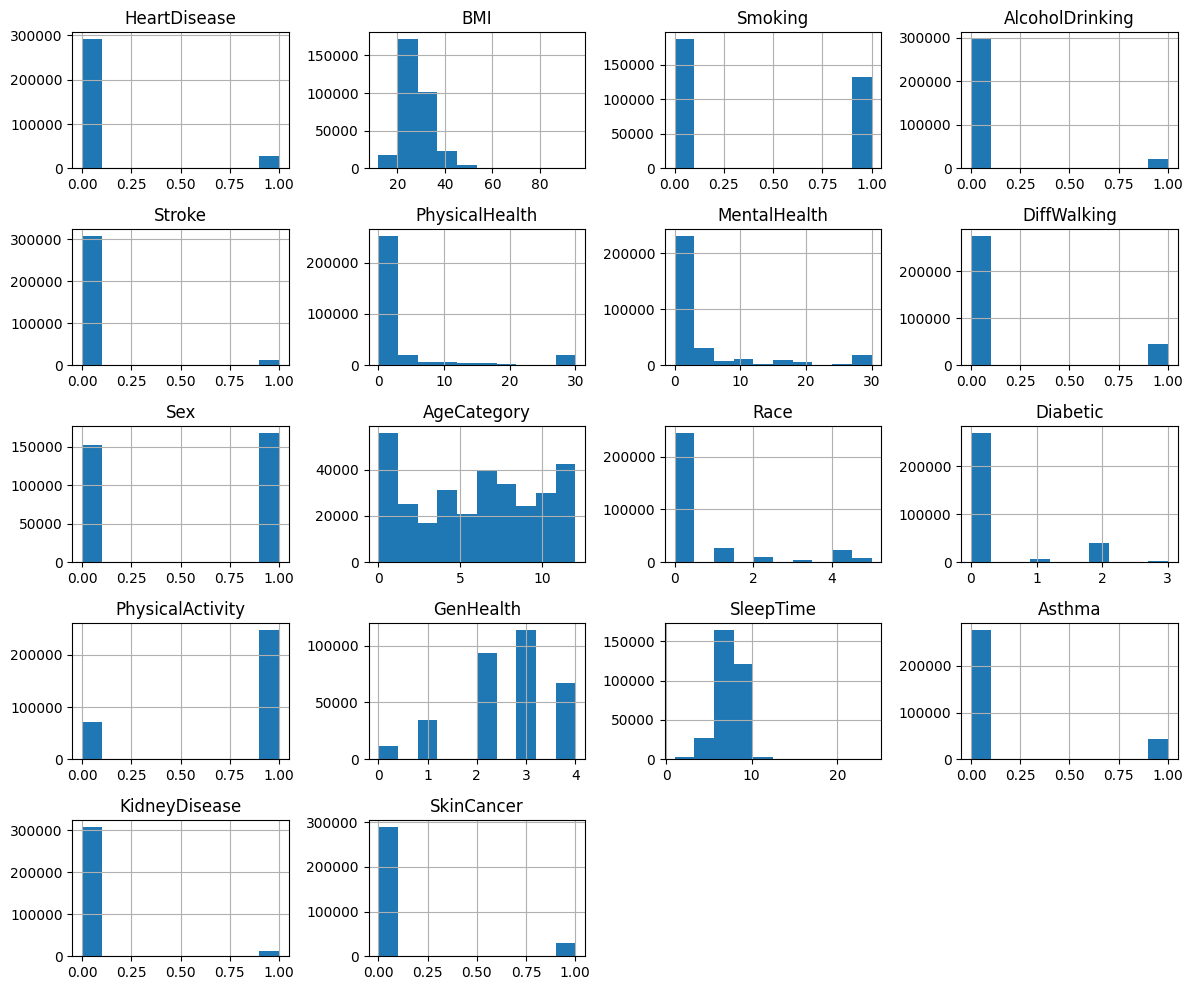

In [55]:
df_heart.hist(bins=10,figsize=(12,10))
plt.tight_layout()
plt.show()

<p align="center"> <font size="4">Boxplot</font></p>

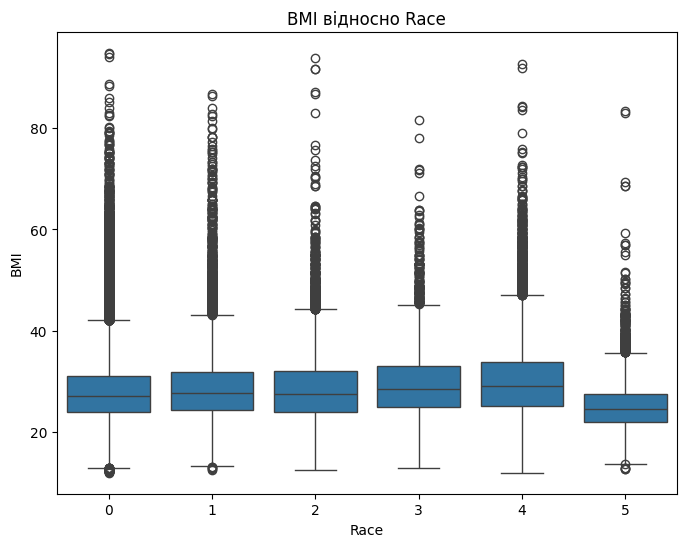

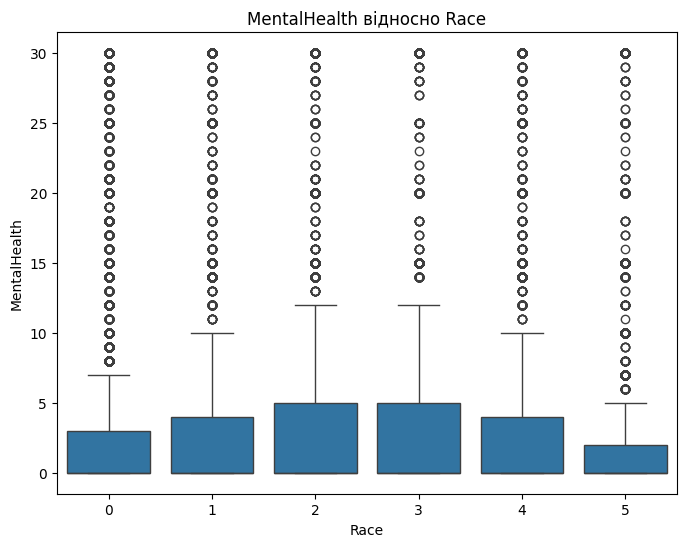

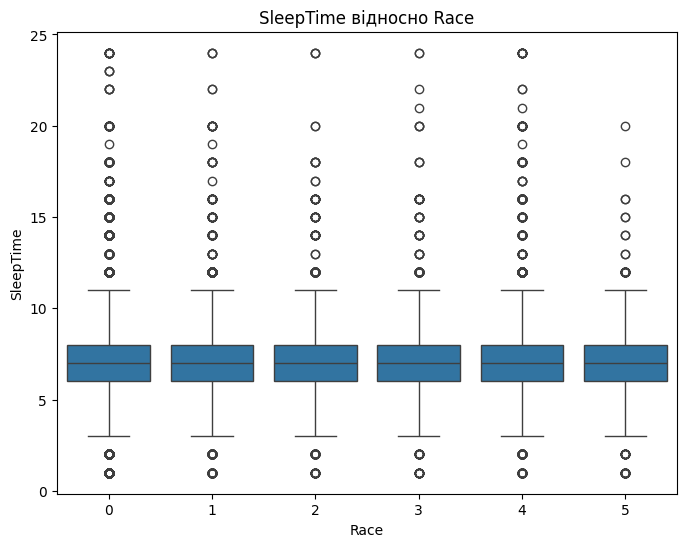

In [56]:
target = 'Race'
features = ['BMI', 'MentalHealth', 'SleepTime']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_heart[target], y=df_heart[feature])
    plt.title(f'{feature} відносно {target}')
    plt.show()

# KNN

In [58]:

X = df_heart.drop('SkinCancer', axis=1)
y = df_heart['SkinCancer']


# Розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Нормалізація даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [59]:
print(confusion_matrix(y_test,pred))

[[55814  2149]
 [ 5479   517]]


In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     57963
           1       0.19      0.09      0.12      5996

    accuracy                           0.88     63959
   macro avg       0.55      0.52      0.53     63959
weighted avg       0.84      0.88      0.86     63959



In [61]:
print(f'kNN Accuracy: {accuracy_score(y_test, pred):.5f}')

kNN Accuracy: 0.88074


# Підбір оптимальних параметрів KNN

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


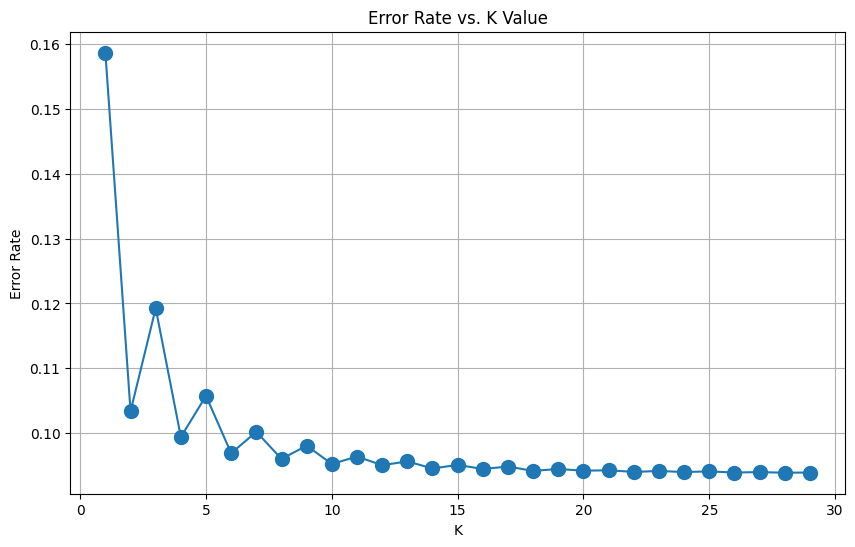

In [62]:
error_rate = []

for i in range(1,30):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [63]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[57835   128]
 [ 5954    42]]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     57963
           1       0.25      0.01      0.01      5996

    accuracy                           0.90     63959
   macro avg       0.58      0.50      0.48     63959
weighted avg       0.84      0.90      0.86     63959



# SVM

In [64]:
df_heartSVM = df_heart.sample(frac=1).reset_index(drop=True)
df_heartSVM = df_heartSVM[:10000]

Xsvm = df_heartSVM.drop('SkinCancer', axis=1)
ysvm = df_heartSVM['SkinCancer']
# Розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(Xsvm, ysvm, test_size=0.2)

model = SVC(C=1, gamma = 0.01, kernel = 'rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1798    0]
 [ 202    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1798
           1       0.00      0.00      0.00       202

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000



/Users/akh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/akh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/akh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### GridSearch

In [65]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [66]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [67]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [68]:
grid_predictions = grid.predict(X_test)

In [69]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[1798    0]
 [ 202    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1798
           1       0.00      0.00      0.00       202

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000



/Users/akh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/akh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/akh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Дерево ухвалення рішень

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [71]:
print(confusion_matrix(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))

[[52725  5189]
 [ 4803  1242]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     57914
           1       0.19      0.21      0.20      6045

    accuracy                           0.84     63959
   macro avg       0.55      0.56      0.56     63959
weighted avg       0.85      0.84      0.85     63959



# Random Forest

In [72]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [73]:
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[56502  1412]
 [ 5650   395]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     57914
           1       0.22      0.07      0.10      6045

    accuracy                           0.89     63959
   macro avg       0.56      0.52      0.52     63959
weighted avg       0.84      0.89      0.86     63959



# AdaBoost

In [74]:
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)


/Users/akh/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [75]:
print(confusion_matrix(y_test,y_pred_ada))
print(classification_report(y_test,y_pred_ada))

[[57909     5]
 [ 6043     2]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     57914
           1       0.29      0.00      0.00      6045

    accuracy                           0.91     63959
   macro avg       0.60      0.50      0.48     63959
weighted avg       0.85      0.91      0.86     63959

